# Student Performance in Exams

The ‘Student Performance in Exams Report’ dataset is trying to investigate what factors influenced a group of American students’ math, reading and writing scores.

In [32]:
#import required packages

import numpy as np
import pandas as pd
import seaborn as sns
import ast, json
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
#load the datatbase

exams =  pd.read_csv("StudentsPerformance.csv", sep=",")
exams.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Data Cleaning

In [34]:
#drop any duplicate rows

exams = exams.drop_duplicates()

In [35]:
#check data types

exams.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [36]:
#visualise unique values of all columns with data type 'object'

gender = exams['gender'].unique()
print(f"There are {len(gender)} gender")
gender

There are 2 gender


array(['female', 'male'], dtype=object)

In [37]:
race_ethnicity = exams['race/ethnicity'].unique()
print(f"There are {len(race_ethnicity)} race/ethnicity")
race_ethnicity

There are 5 race/ethnicity


array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [38]:
parent_education = exams['parental level of education'].unique()
print(f"There are {len(parent_education)} parental level of education")
parent_education

There are 6 parental level of education


array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [39]:
lunch = exams['lunch'].unique()
print(f"There are {len(lunch)} lunch")
lunch

There are 2 lunch


array(['standard', 'free/reduced'], dtype=object)

In [40]:
test_prep = exams['test preparation course'].unique()
print(f"There are {len(test_prep)} test preparation course")
test_prep

There are 2 test preparation course


array(['none', 'completed'], dtype=object)

# Missing Data

In [41]:
#view all missing data

missing_values_count = df.isnull().sum()

missing_values_count

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

# Data Stories and Visualisations

# 1. New Column

In [59]:
#used statology for help: https://www.statology.org/pandas-sum-specific-columns/#:~:text=How%20to%20Sum%20Specific%20Columns%20in%20Pandas%20%28With,practice%20with%20the%20following%20pandas%20DataFrame%3A%20More%20items
cols = ['math score', 'reading score', 'writing score']

exams['overall score'] = exams[cols].sum(axis=1)

In [60]:
exams.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,overall score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


# 2. Gender

In [262]:
#averages defined by column gender

group_by_gender = exams.groupby(by=['gender'])
data_avg = round(group_by_gender.mean(),0)
data_avg

,math score,reading score,writing score,overall score
gender,,,,
female,64.0,73.0,72.0,209.0
male,69.0,65.0,63.0,198.0


By comparing male and female students it can be shown that female students on average performed better than male students in reading and writing but male students scored higher in math.

<AxesSubplot:xlabel='gender'>

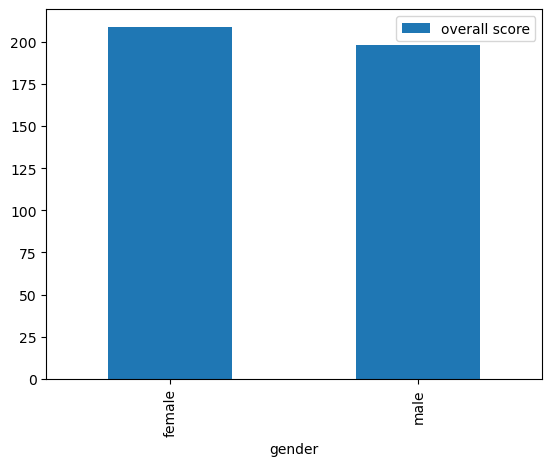

In [263]:
gender = pd.DataFrame({'overall score': data_avg['overall score']})

gender.plot(kind='bar')

The bar chart shows that female students have a higher average overall score than male students.

Gender will not be considered as an influencing factor on student’s score as the difference of the average overall score is so small.

# 3.Lunch

In [266]:
#averages defined by column lunch

group_by_lunch = exams.groupby(by=['lunch'])
data_avg = round(group_by_lunch.mean(),0)
data_avg

,math score,reading score,writing score,overall score
lunch,,,,
free/reduced,59.0,65.0,63.0,187.0
standard,70.0,72.0,71.0,213.0


The average overall score of students on a free/reduced lunch is 183. The average overall score of students on a standard lunch is 213.

<AxesSubplot:title={'center':'lunch'}>

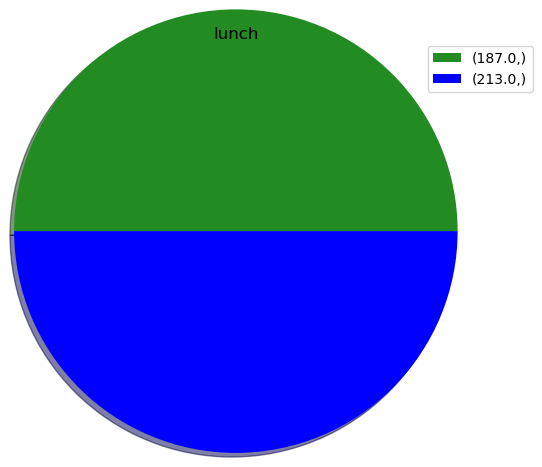

In [271]:
#pie chart to visualise data

lunch = pd.DataFrame({'overall score': data_avg['overall score']})

data = lunch.value_counts().plot(kind="pie", title='lunch', ylabel='', labeldistance=None, radius=1.5, shadow=True, colors=colors, legend = True)
data.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
data

The average overall score of students on a free/reduced lunch is lower. 

The pie chart indicates that lunch could be a defining factor which influences the score of students.

# 4. Test Preparation Course

In [272]:
#averages defined by column test preparation course column

group_by_prep = exams.groupby(by=['test preparation course'])
data_avg = round(group_by_prep.mean(),0)
data_avg

,math score,reading score,writing score,overall score
test preparation course,,,,
completed,70.0,74.0,74.0,218.0
none,64.0,67.0,65.0,195.0


Students who completed the course scored higher on average than students who did not complete the course.

<AxesSubplot:xlabel='test preparation course'>

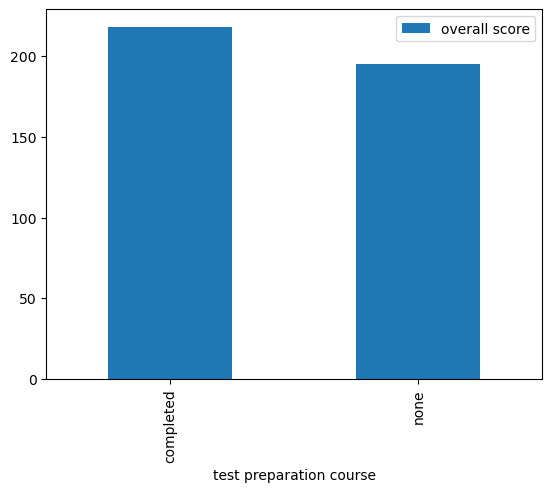

In [275]:
prep = pd.DataFrame({'overall score': data_avg['overall score']})

prep.plot(kind='bar')

The bar chart shows that by completing the test preparation course a student could achieve a higher score.

# 5. Race/Ethnicity

In [72]:
#average scores of race/ethnicity groups

group_by_race = exams.groupby(by=['race/ethnicity'])
data_avg = round(group_by_race.mean(),0)
data_avg

,math score,reading score,writing score,overall score
race/ethnicity,,,,
group A,62.0,65.0,63.0,189.0
group B,63.0,67.0,66.0,196.0
group C,64.0,69.0,68.0,201.0
group D,67.0,70.0,70.0,208.0
group E,74.0,73.0,71.0,218.0


<AxesSubplot:xlabel='race/ethnicity'>

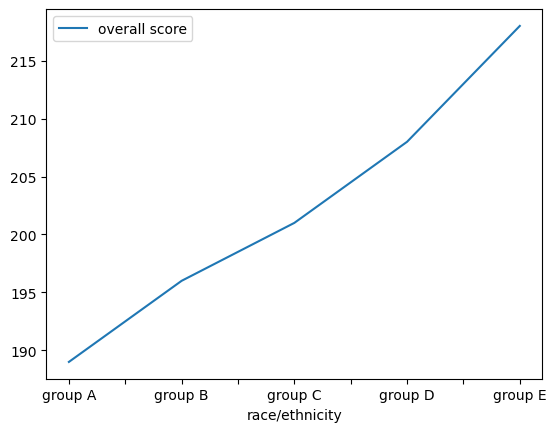

In [80]:
#line graph of average overall score of each race/ethnicity group

overall_score = pd.DataFrame({'overall score': data_avg['overall score']})

overall_score.plot(kind='line')

The line graph highlights that group A had the lowest score, and group E had the highest score.

Going forward, group A and group E will be compared to decipher which factor influenced a student’s score the most.

# 6. Group A

In [142]:
#filter database to only students in group A

group_A = exams[(exams['race/ethnicity']== "group A")]
#group_A
print(f"Number of students in group A: {len(group_A.axes[0])}")


Number of students in group A: 89


In [144]:
#filter data further to only show group A students whose parents education level is high school

group_A_highschool = exams[(exams['race/ethnicity']== "group A")&(exams['parental level of education'] == "high school")]

In [145]:
#number of students in this group

print(f"Number of students in group A and whose parental level of education is high school: {len(group_A_highschool.axes[0])}")

Number of students in group A and whose parental level of education is high school: 18


In [146]:
#this group's average scores

group_by = group_A_highschool.groupby(by=['race/ethnicity'])
data_avg_highschool = round(group_by.mean(),0)

#changed column name to identify easier: https://www.geeksforgeeks.org/how-to-rename-columns-in-pandas-dataframe/ 

data_avg_highschool.rename(columns = {'overall score':'overall score: highschool'}, inplace = True)
data_avg_highschool

,math score,reading score,writing score,overall score: highschool
race/ethnicity,,,,
group A,60.0,63.0,60.0,184.0



The average overall score for students whose parental education level is high school is 184.


In [147]:
#filter data further to only show group A students whose parents education level is some high school

group_A_Shighschool = exams[(exams['race/ethnicity']== "group A")&(exams['parental level of education'] == "some high school")]

In [148]:
#number of students in this group

print(f"Number of students in group A and whose parental level of education is some high school: {len(group_A_Shighschool.axes[0])}")

Number of students in group A and whose parental level of education is some high school: 24


In [149]:
#this group's average scores

group_by = group_A_Shighschool.groupby(by=['race/ethnicity'])
data_avg_Shighschool = round(group_by.mean(),0)
data_avg_Shighschool.rename(columns = {'overall score':'overall score: some highschool'}, inplace = True)
data_avg_Shighschool

,math score,reading score,writing score,overall score: some highschool
race/ethnicity,,,,
group A,59.0,62.0,59.0,180.0


The average overall score for students whose parental education level is some high school is 180.

In [150]:
#filter data further to only show group A students whose parents education level is some college

group_A_Scollege = exams[(exams['race/ethnicity']== "group A")&(exams['parental level of education'] == "some college")]

In [151]:
#number of students in this group

print(f"Number of students in group A and whose parental level of education is some college: {len(group_A_Scollege.axes[0])}")

Number of students in group A and whose parental level of education is some college: 18


In [152]:
#this group's average scores

group_by = group_A_Scollege.groupby(by=['race/ethnicity'])
data_avg_Scollege = round(group_by.mean(),0)
data_avg_Scollege.rename(columns = {'overall score':'overall score: some college'}, inplace = True)
data_avg_Scollege

,math score,reading score,writing score,overall score: some college
race/ethnicity,,,,
group A,64.0,66.0,65.0,195.0



The average overall score for students whose parental education level is some college is 195.


In [153]:
#filter data further to only show group A students whose parents education level is college

group_A_college = exams[(exams['race/ethnicity']== "group A")&(exams['parental level of education'] == "associate's degree")|
                       (exams['race/ethnicity']== "group A")&(exams['parental level of education'] == "master's degree")|
                        (exams['race/ethnicity']== "group A")&(exams['parental level of education'] == "bachelor's degree")]

In [154]:
#number of students in this group

print(f"Number of students in group A and whose parental level of education is college: {len(group_A_college.axes[0])}")

Number of students in group A and whose parental level of education is college: 29


In [155]:
#this group's average scores

group_by = group_A_college.groupby(by=['race/ethnicity'])
data_avg_college = round(group_by.mean(),0)
data_avg_college.rename(columns = {'overall score':'overall score: college'}, inplace = True)
data_avg_college

,math score,reading score,writing score,overall score: college
race/ethnicity,,,,
group A,63.0,67.0,66.0,196.0


In [ ]:
The average overall score for students whose parental education level is college is 196.

<AxesSubplot:>

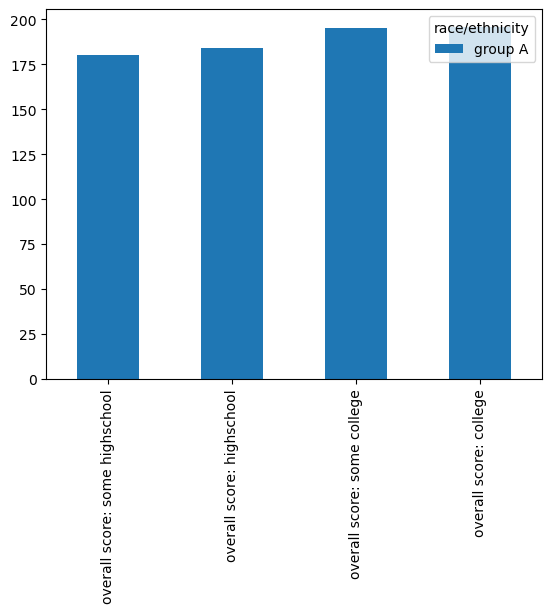

In [163]:
#created temp database to create a chart which shows each education level's overall score in group A

highschool = data_avg_highschool['overall score: highschool']
some_highschool = data_avg_Shighschool['overall score: some highschool']
some_college = data_avg_Scollege['overall score: some college']
college = data_avg_college['overall score: college']

temp_df = (some_highschool, highschool, some_college, college)
temp_df = pd.DataFrame(temp_df)
temp_df.plot(kind='bar')

Bar chart shows that within group A, the higher the parents’ education the higher the student’s overall score.

In [169]:
#filter data to only show those in group A with lunch options

group_A = exams[(exams['race/ethnicity']== "group A")&(exams['lunch'] == 'free/reduced')|
               (exams['race/ethnicity']== "group A")&(exams['lunch'] == 'standard')]


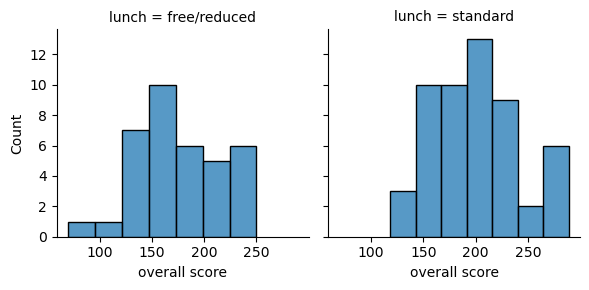

In [256]:
#multi-plot grid comparing overall score of those who in group A who recieved free/reduced or standard lunches

fg=sns.FacetGrid(group_A, col ='lunch')
fg.map_dataframe(sns.histplot,'overall score')
plt.show()
plt.close()

A multi-plot grid comparing students lunch status shows that students with a standard lunch scored higher overall than
a student with a free/reduced lunch.

In [ ]:
#filter data to only show those in group A with test preparation course

group_A = exams[(exams['race/ethnicity']== "group A")&(exams['test preparation course'] == 'none')|
               (exams['race/ethnicity']== "group A")&(exams['test preparation course'] == 'completed')]

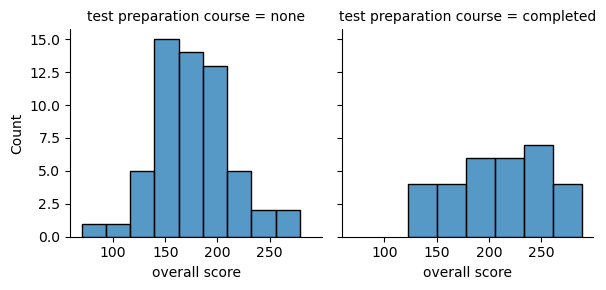

In [179]:
#multi-plot grid comparing overall score of those in group A who did and did not complete the test preparation course

fg=sns.FacetGrid(group_A, col ='test preparation course')
fg.map_dataframe(sns.histplot,'overall score')
plt.show()
plt.close()

A multi-plot grid shows that students were more likely to score over 250 if they completed the test preparation course and that students were more likely to score under 150 if they did not complete course. However, between the scores 150 and 250 it doesn’t seem to have made too much of a difference.

In [277]:
#filter to show student's with all disadvantageous factors

category_A = exams[(exams['race/ethnicity']== "group A")&(exams['parental level of education']== "some high school")&
                     (exams['test preparation course'] == 'none')&(exams['lunch'] == 'free/reduced')]
category_A

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,overall score
61,male,group A,some high school,free/reduced,none,39,39,34,112
228,male,group A,some high school,free/reduced,none,68,72,64,204
368,female,group A,some high school,free/reduced,none,44,64,58,166
384,female,group A,some high school,free/reduced,none,38,43,43,124
428,male,group A,some high school,free/reduced,none,65,59,53,177
433,female,group A,some high school,free/reduced,none,47,59,50,156
442,female,group A,some high school,free/reduced,none,59,73,69,201
444,male,group A,some high school,free/reduced,none,79,82,73,234
731,male,group A,some high school,free/reduced,none,55,46,43,144
988,female,group A,some high school,free/reduced,none,44,45,45,134


In [278]:
#filter to show student's with all advantageous factors

category_B = exams[(exams['race/ethnicity']== "group A")&(exams['parental level of education']== "associate's degree")&
                     (exams['test preparation course'] == 'completed')&(exams['lunch'] == 'standard')|
                    (exams['race/ethnicity']== "group A")&(exams['parental level of education']== "master's degree")&
                     (exams['test preparation course'] == 'completed')&(exams['lunch'] == 'standard')|
                    (exams['race/ethnicity']== "group A")&(exams['parental level of education']== "bachelor's degree")&
                     (exams['test preparation course'] == 'completed')&(exams['lunch'] == 'standard')]
category_B

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,overall score
46,female,group A,associate's degree,standard,completed,55,65,62,182
77,male,group A,bachelor's degree,standard,completed,80,78,81,239
464,male,group A,bachelor's degree,standard,completed,75,58,62,195
539,male,group A,associate's degree,standard,completed,97,92,86,275
653,female,group A,associate's degree,standard,completed,65,70,74,209
702,male,group A,bachelor's degree,standard,completed,87,84,87,258


Comparing the overall score of category_A to category_B shows:

•	That 4 out of 10 students scored below 150 in category_A. A further 2 scored below 170.

•	Only 3 students scored above 180 in category_A.

•	All students (6) in category_B scored above 180.


# 7. Group E

In [185]:
#filter database to only students in group E

group_E = exams[(exams['race/ethnicity']== "group E")]
#group_E
print(f"Number of students in group E: {len(group_E.axes[0])}")


Number of students in group E: 140


In [188]:
#filter data further to only show group E students whose parents education level is high school

group_E_highschool = exams[(exams['race/ethnicity']== "group E")&(exams['parental level of education'] == "high school")]

In [189]:
#number of students in this group

print(f"Number of students in group E and whose parental level of education is high school: {len(group_E_highschool.axes[0])}")

Number of students in group E and whose parental level of education is high school: 22


In [190]:
#this group's average scores

group_by = group_E_highschool.groupby(by=['race/ethnicity'])
data_avg_highschool = round(group_by.mean(),0)

#changed column name to identify easier: https://www.geeksforgeeks.org/how-to-rename-columns-in-pandas-dataframe/ 

data_avg_highschool.rename(columns = {'overall score':'overall score: highschool'}, inplace = True)
data_avg_highschool

,math score,reading score,writing score,overall score: highschool
race/ethnicity,,,,
group E,71.0,70.0,68.0,209.0


The average overall score for students whose parental education level is high school is 209.

In [193]:
#filter data further to only show group E students whose parents education level is some high school

group_E_Shighschool = exams[(exams['race/ethnicity']== "group E")&(exams['parental level of education'] == "some high school")]

In [194]:
#number of students in this group

print(f"Number of students in group E and whose parental level of education is some high school: {len(group_E_Shighschool.axes[0])}")

Number of students in group E and whose parental level of education is some high school: 18


In [195]:
#this group's average scores

group_by = group_E_Shighschool.groupby(by=['race/ethnicity'])
data_avg_Shighschool = round(group_by.mean(),0)
data_avg_Shighschool.rename(columns = {'overall score':'overall score: some highschool'}, inplace = True)
data_avg_Shighschool

,math score,reading score,writing score,overall score: some highschool
race/ethnicity,,,,
group E,72.0,70.0,67.0,208.0


The average overall score for students whose parental education level is some high school is 208.

In [198]:
#filter data further to only show group E students whose parents education level is some college

group_E_Scollege = exams[(exams['race/ethnicity']== "group E")&(exams['parental level of education'] == "some college")]

In [199]:
#number of students in this group

print(f"Number of students in group E and whose parental level of education is some college: {len(group_E_Scollege.axes[0])}")

Number of students in group E and whose parental level of education is some college: 35


In [200]:
#this group's average scores

group_by = group_E_Scollege.groupby(by=['race/ethnicity'])
data_avg_Scollege = round(group_by.mean(),0)
data_avg_Scollege.rename(columns = {'overall score':'overall score: some college'}, inplace = True)
data_avg_Scollege

,math score,reading score,writing score,overall score: some college
race/ethnicity,,,,
group E,74.0,73.0,70.0,217.0


The average overall score for students whose parental education level is some college is 217.

In [202]:
#filter data further to only show group E students whose parents education level is college

group_E_college = exams[(exams['race/ethnicity']== "group E")&(exams['parental level of education'] == "associate's degree")|
                       (exams['race/ethnicity']== "group E")&(exams['parental level of education'] == "master's degree")|
                        (exams['race/ethnicity']== "group E")&(exams['parental level of education'] == "bachelor's degree")]

In [203]:
#number of students in this group

print(f"Number of students in group E and whose parental level of education is college: {len(group_E_college.axes[0])}")

Number of students in group E and whose parental level of education is college: 65


In [204]:
#this group's average scores

group_by = group_E_college.groupby(by=['race/ethnicity'])
data_avg_college = round(group_by.mean(),0)
data_avg_college.rename(columns = {'overall score':'overall score: college'}, inplace = True)
data_avg_college

,math score,reading score,writing score,overall score: college
race/ethnicity,,,,
group E,75.0,75.0,75.0,225.0


The average overall score for students whose parental education level is college is 225.

<AxesSubplot:>

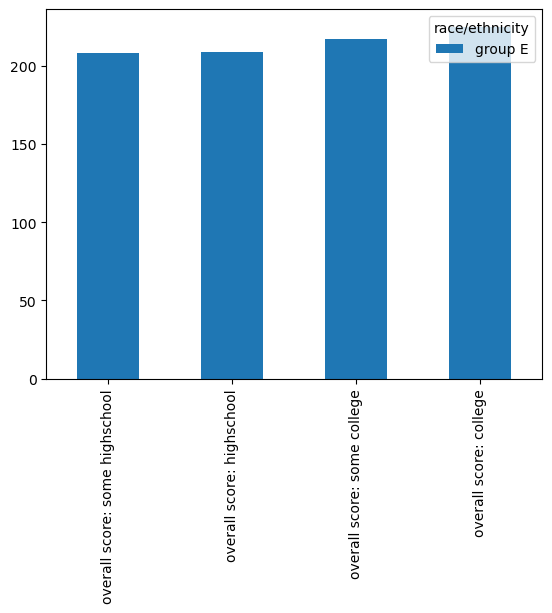

In [246]:
#created temp database to create a chart which shows each education level's overall score in group E

highschool = data_avg_highschool['overall score: highschool']
some_highschool = data_avg_Shighschool['overall score: some highschool']
some_college = data_avg_Scollege['overall score: some college']
college = data_avg_college['overall score: college']

temp_df = (some_highschool, highschool, some_college, college)
temp_df = pd.DataFrame(temp_df)
temp_df.plot(kind='bar')

Bar chart shows that within group E, the higher the parents’ education the higher the student’s overall score.

In [ ]:
#filter data to only show those in group E with lunch options

group_E = exams[(exams['race/ethnicity']== "group E")&(exams['lunch'] == 'free/reduced')|
               (exams['race/ethnicity']== "group E")&(exams['lunch'] == 'standard')]

<AxesSubplot:>

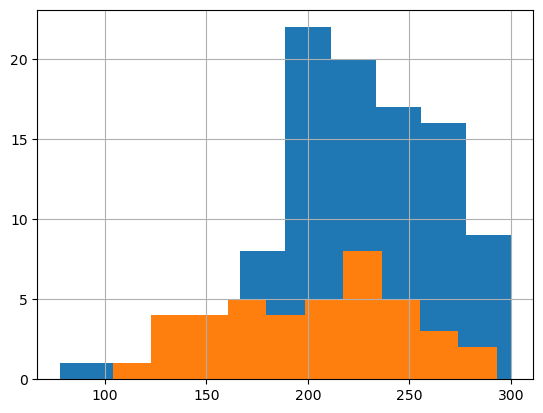

In [254]:
#histogram comparing overall score of those in group E who did recieve a free/reduced lunch

a = exams[(exams['race/ethnicity']== "group E")&(exams['lunch'] == 'free/reduced')]
b = exams[(exams['race/ethnicity']== "group E")&(exams['lunch'] == 'standard')]
b['overall score'].hist()
a['overall score'].hist()
#blue == b and orange == a

By comparing students’ lunch status, it can be shown that students with a standard lunch scored higher than students with a free/reduced lunch.

In [248]:
#filter data to only show those in group A with test preparation course

group_A = exams[(exams['race/ethnicity']== "group A")&(exams['test preparation course'] == 'none')|
               (exams['race/ethnicity']== "group A")&(exams['test preparation course'] == 'completed')]

<AxesSubplot:>

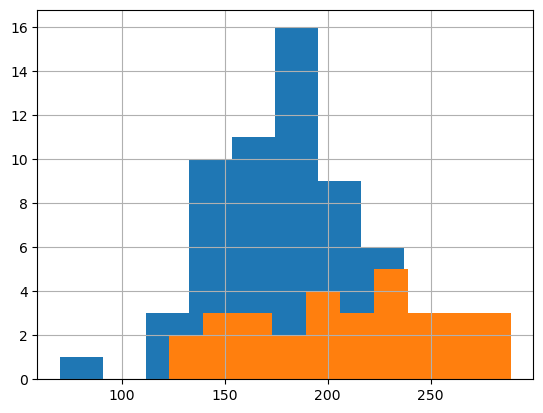

In [280]:
#histogram comparing overall score of those in group E who did and did not complete the test preparation course

c = exams[(exams['race/ethnicity']== "group A")&(exams['test preparation course'] == 'none')]
d = exams[(exams['race/ethnicity']== "group A")&(exams['test preparation course'] == 'completed')]
c['overall score'].hist()
d['overall score'].hist()
#blue == c and orange == d

A histogram shows that if you didn’t complete the test preparation course you were more likely to score below 150 overall and if you did complete the course, you were more likely to score above 250.

Again, the middle scores do not seem to be affected by whether or not you completed the test preparation course.

In [281]:
#filter to show student's with all disadvantageous factors

category_C = exams[(exams['race/ethnicity']== "group E")&(exams['parental level of education']== "some high school")&
                     (exams['test preparation course'] == 'none')&(exams['lunch'] == 'free/reduced')]
category_C

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,overall score
383,female,group E,some high school,free/reduced,none,38,49,45,132
786,female,group E,some high school,free/reduced,none,72,79,77,228
895,female,group E,some high school,free/reduced,none,32,34,38,104
952,female,group E,some high school,free/reduced,none,74,74,72,220


In [282]:
#filter to show student's with all advantageous factors

category_D = exams[(exams['race/ethnicity']== "group E")&(exams['parental level of education']== "associate's degree")&
                     (exams['test preparation course'] == 'completed')&(exams['lunch'] == 'standard')|
                    (exams['race/ethnicity']== "group E")&(exams['parental level of education']== "master's degree")&
                     (exams['test preparation course'] == 'completed')&(exams['lunch'] == 'standard')|
                    (exams['race/ethnicity']== "group E")&(exams['parental level of education']== "bachelor's degree")&
                     (exams['test preparation course'] == 'completed')&(exams['lunch'] == 'standard')]
category_D

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,overall score
35,male,group E,associate's degree,standard,completed,81,81,79,241
56,female,group E,associate's degree,standard,completed,82,85,86,253
107,male,group E,associate's degree,standard,completed,66,63,64,193
114,female,group E,bachelor's degree,standard,completed,99,100,100,299
286,male,group E,associate's degree,standard,completed,97,82,88,267
297,male,group E,associate's degree,standard,completed,71,74,68,213
332,male,group E,associate's degree,standard,completed,62,56,53,171
476,male,group E,bachelor's degree,standard,completed,76,62,66,204
503,female,group E,associate's degree,standard,completed,95,89,92,276
532,male,group E,associate's degree,standard,completed,62,61,58,181


Comparing the overall score of category_C to category_D shows:

•	There are only four students who fall into category C.

•	2 of those students scored above 200 and the other 2 scored below 150.

•	There are 21 students who fall into category D.

•	Only 3 score below 200. The other students scored above 200.

•	1 student in category D scored 300. (100%)

# 8. Assumptions

The most influencing factor of a student’s score in order:

1.	Race/Ethnicity
2.	Parental education level
3.	Lunch
4.	Test preparation course
